In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings ('ignore')

In [98]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [99]:
print ('Number of Rows:', df.shape[0])
print ('Number of Columns:', df.shape [1])

Number of Rows: 32560
Number of Columns: 15


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Observation:
1. This dataset comprises two distinct data types: 'int64 ' and 'object'
2. There are 9 columns with 'object' data type and 6 columns with 'int' data type in the dataset.
3. Additionally, there are no null values present within this dataset.

#### CHECKING THE NULL VALUES

In [101]:
[features for features in df.columns if df[features].isnull().sum()]

[]

In [102]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

#### OBSERVATION:
Confirm No null data present in this dataset

In [103]:
for i in df.columns:
    print (df[i].value_counts())
    print ('\n')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype

In [104]:
df.nunique().to_frame('No of unique value')

,No of unique value
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [105]:
Catagorical_col=[]
Numarical_col=[]

for i in df.columns:
    if df.dtypes[i]=='object':
        Catagorical_col.append(i)

print ('Catagorical Column names:',Catagorical_col) 

for i in df.columns:
    if df.dtypes[i]!='object':
        Numarical_col.append (i)

print ('Numarical Columns name:',Numarical_col)
        
    
        


Catagorical Column names: ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
Numarical Columns name: ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


Text(0.5, 0, 'Age')

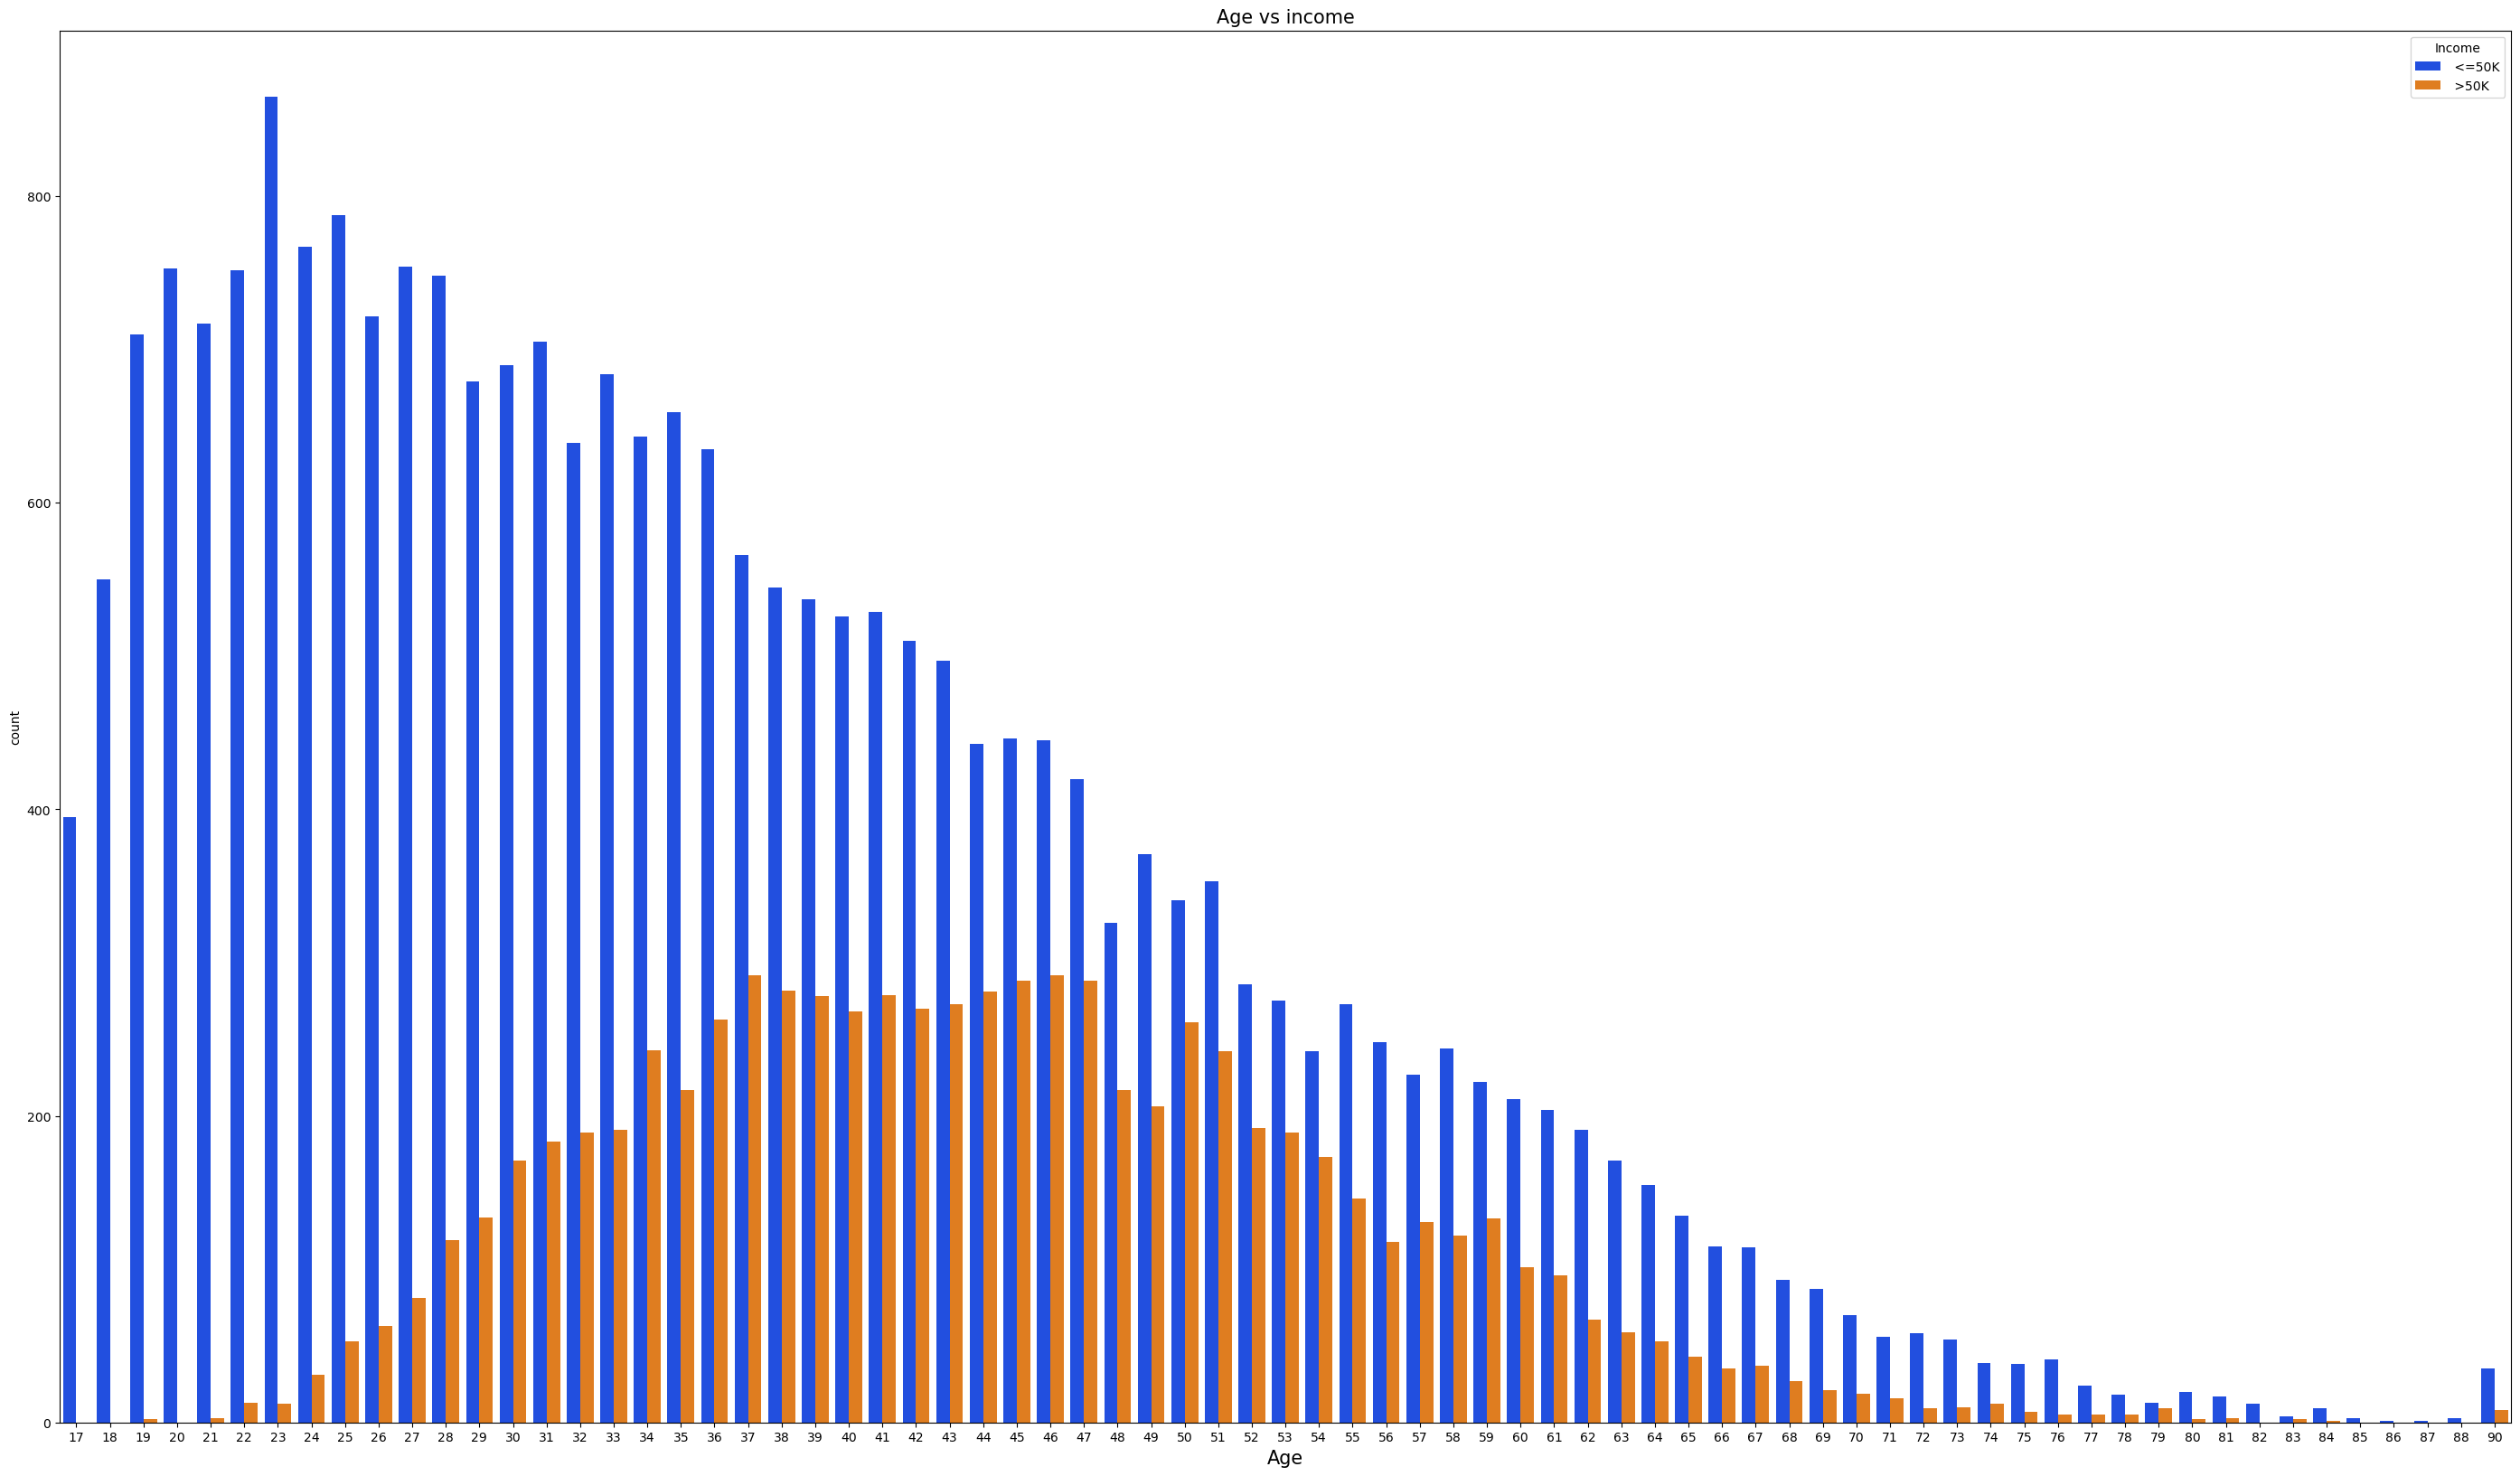

In [106]:
print (df['Age'].value_counts())
plt.figure(figsize=(35,20))
sns.countplot(df,x='Age',hue='Income',palette='bright')
plt.title('Age vs income',fontsize=15)
plt.xlabel ('Age',fontsize=15)

#### OBSERVATION:
Individuals aged between 37 and 47 years old earning over $50,000 annually.


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


Text(0, 0.5, 'Count')

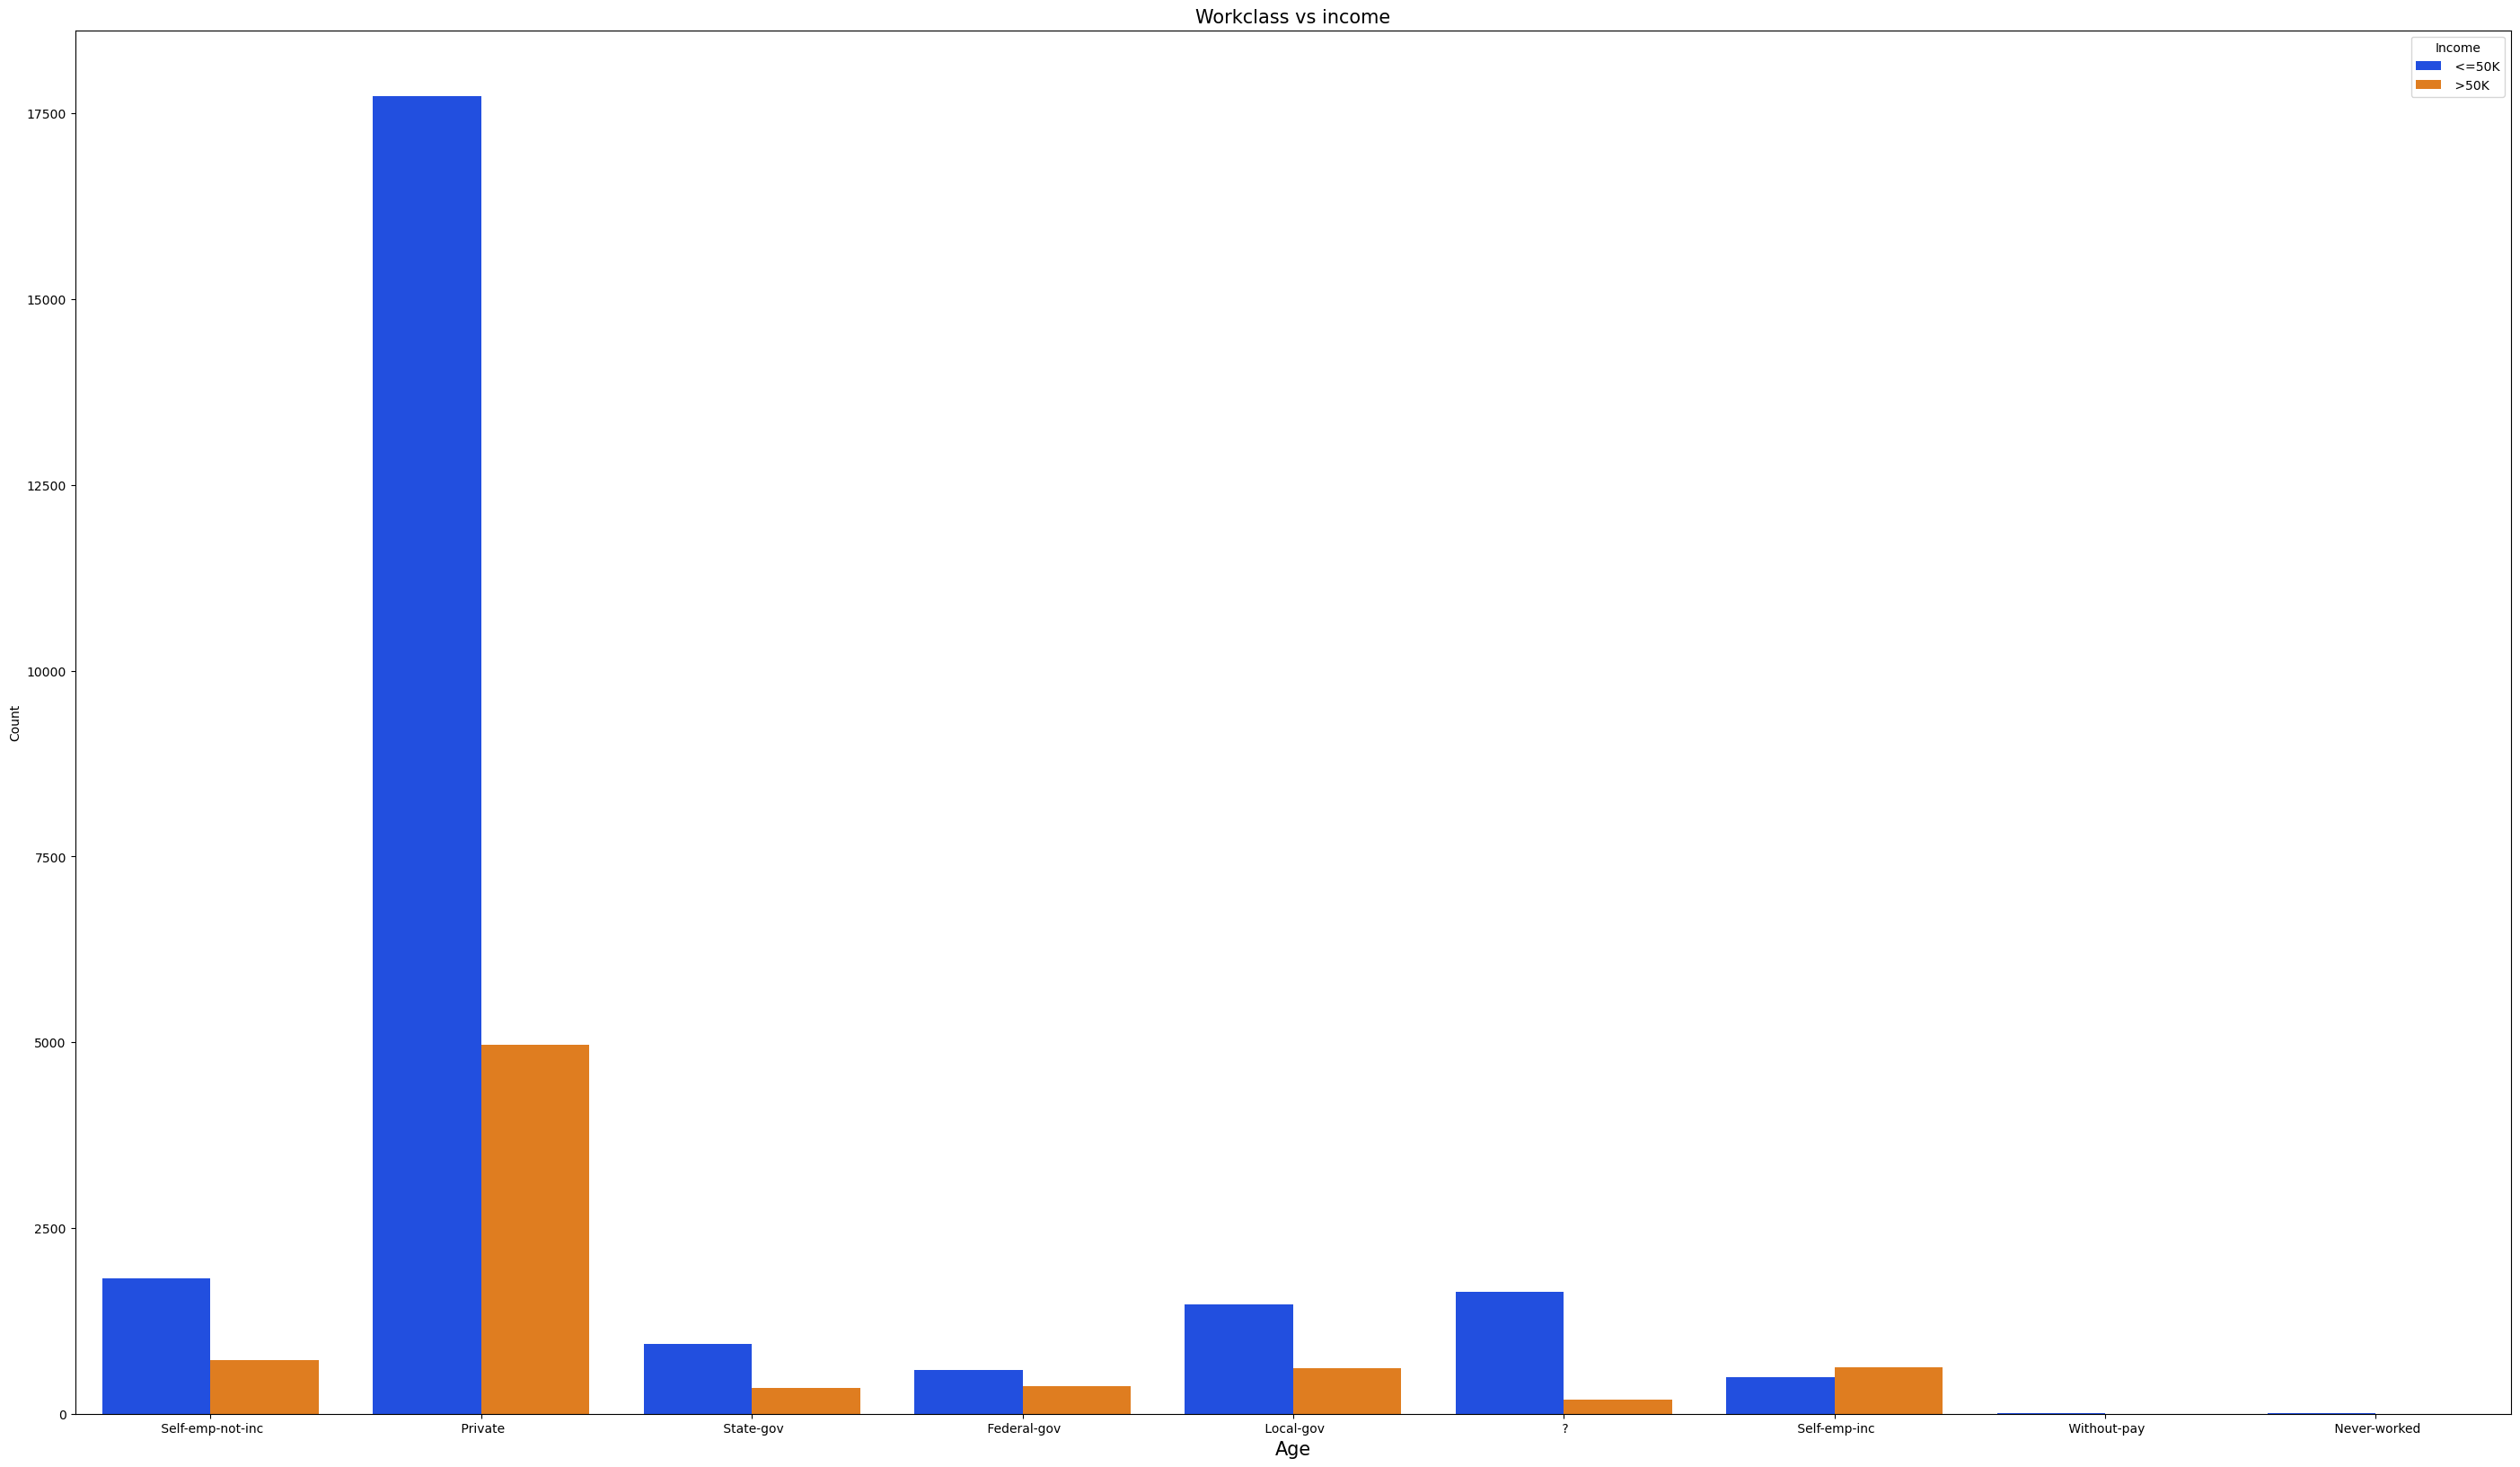

In [107]:
print (df['Workclass'].value_counts())
plt.figure(figsize=(35,20))
sns.countplot(df,x='Workclass',hue='Income',palette='bright')
plt.title('Workclass vs income',fontsize=15)
plt.xlabel ('Age',fontsize=15)
plt.ylabel('Count')

#### OBSERVATION:
Individuals employed in the private sector typically earn an annual income exceeding $50,000

In [108]:
df['Fnlwgt'].nunique()

21647

#### OBSERVATION:
Given the high number of unique values in this column and its lack of significant predictive power for the target variable, it appears prudent to drop this column from the analysis.

In [109]:
df.drop('Fnlwgt',axis=1,inplace=True)

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


Text(0, 0.5, 'Count')

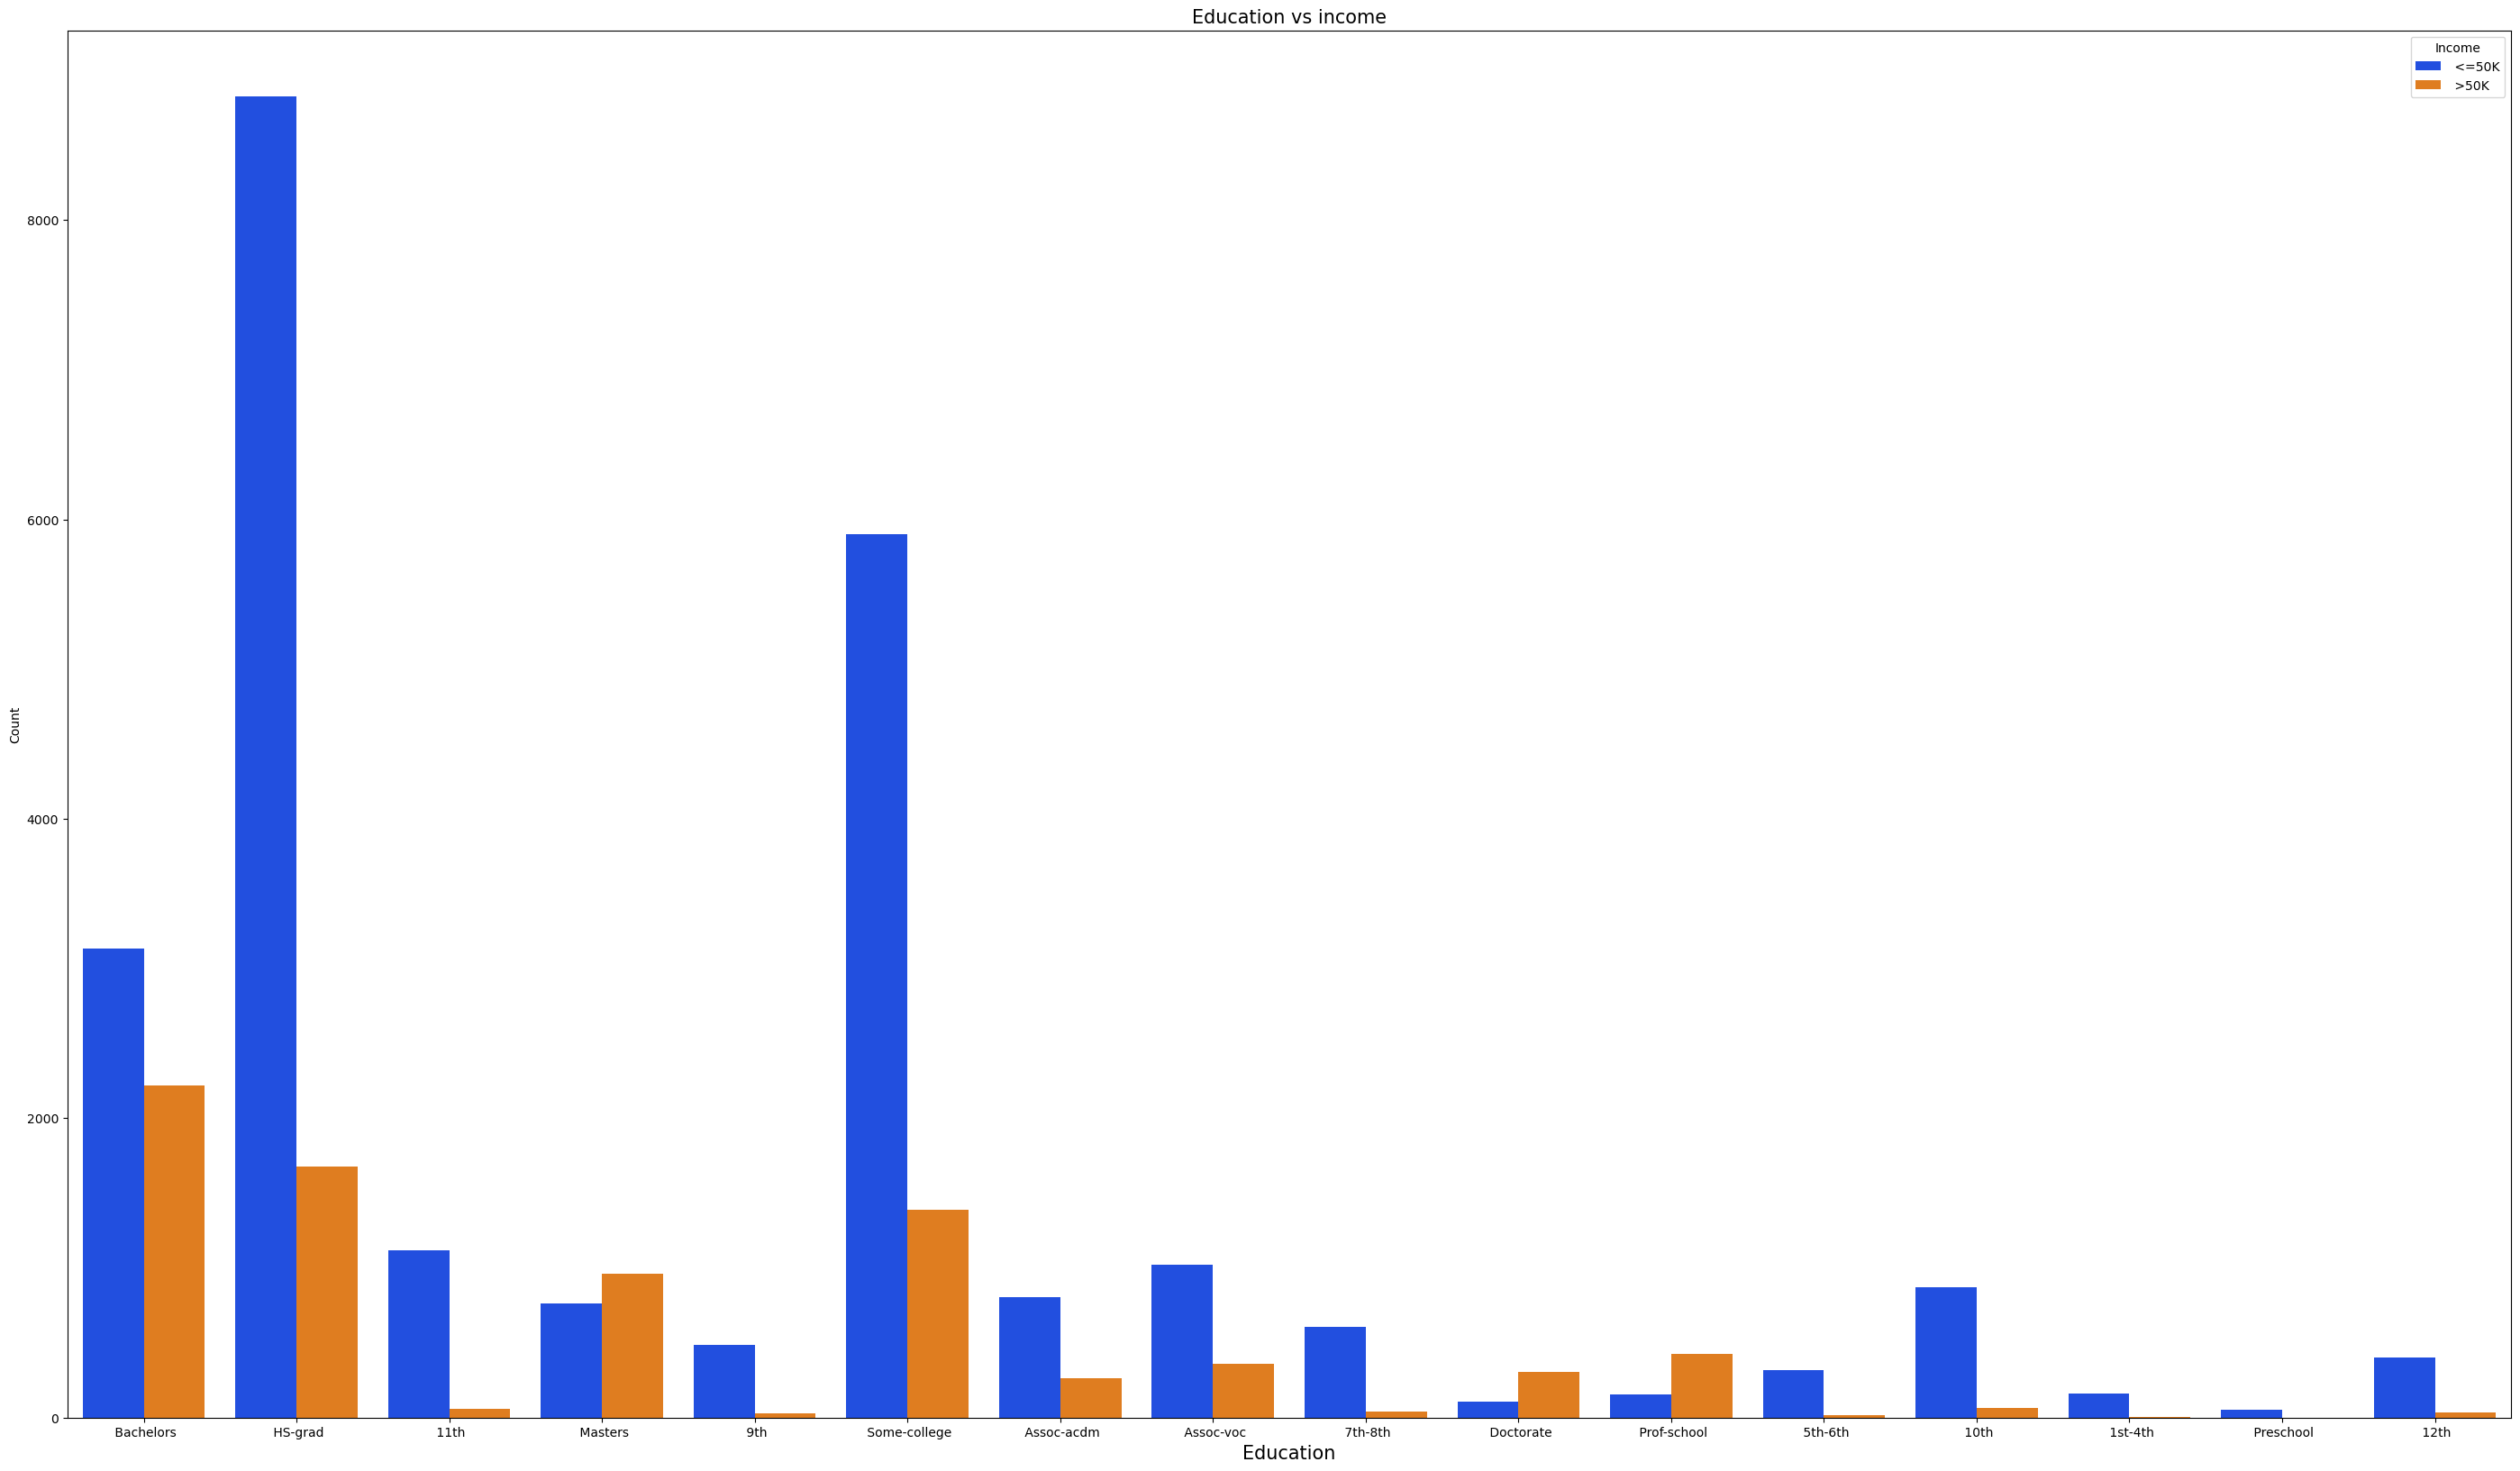

In [110]:
print (df['Education'].value_counts())
plt.figure(figsize=(35,20))
sns.countplot(df,x='Education',hue='Income',palette='bright')
plt.title('Education vs income',fontsize=15)
plt.xlabel ('Education',fontsize=15)
plt.ylabel('Count')

#### OBSERVATION:
Individuals employed in the Bachelors sector typically earn an annual income exceeding $50,000

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


Text(0, 0.5, 'Count')

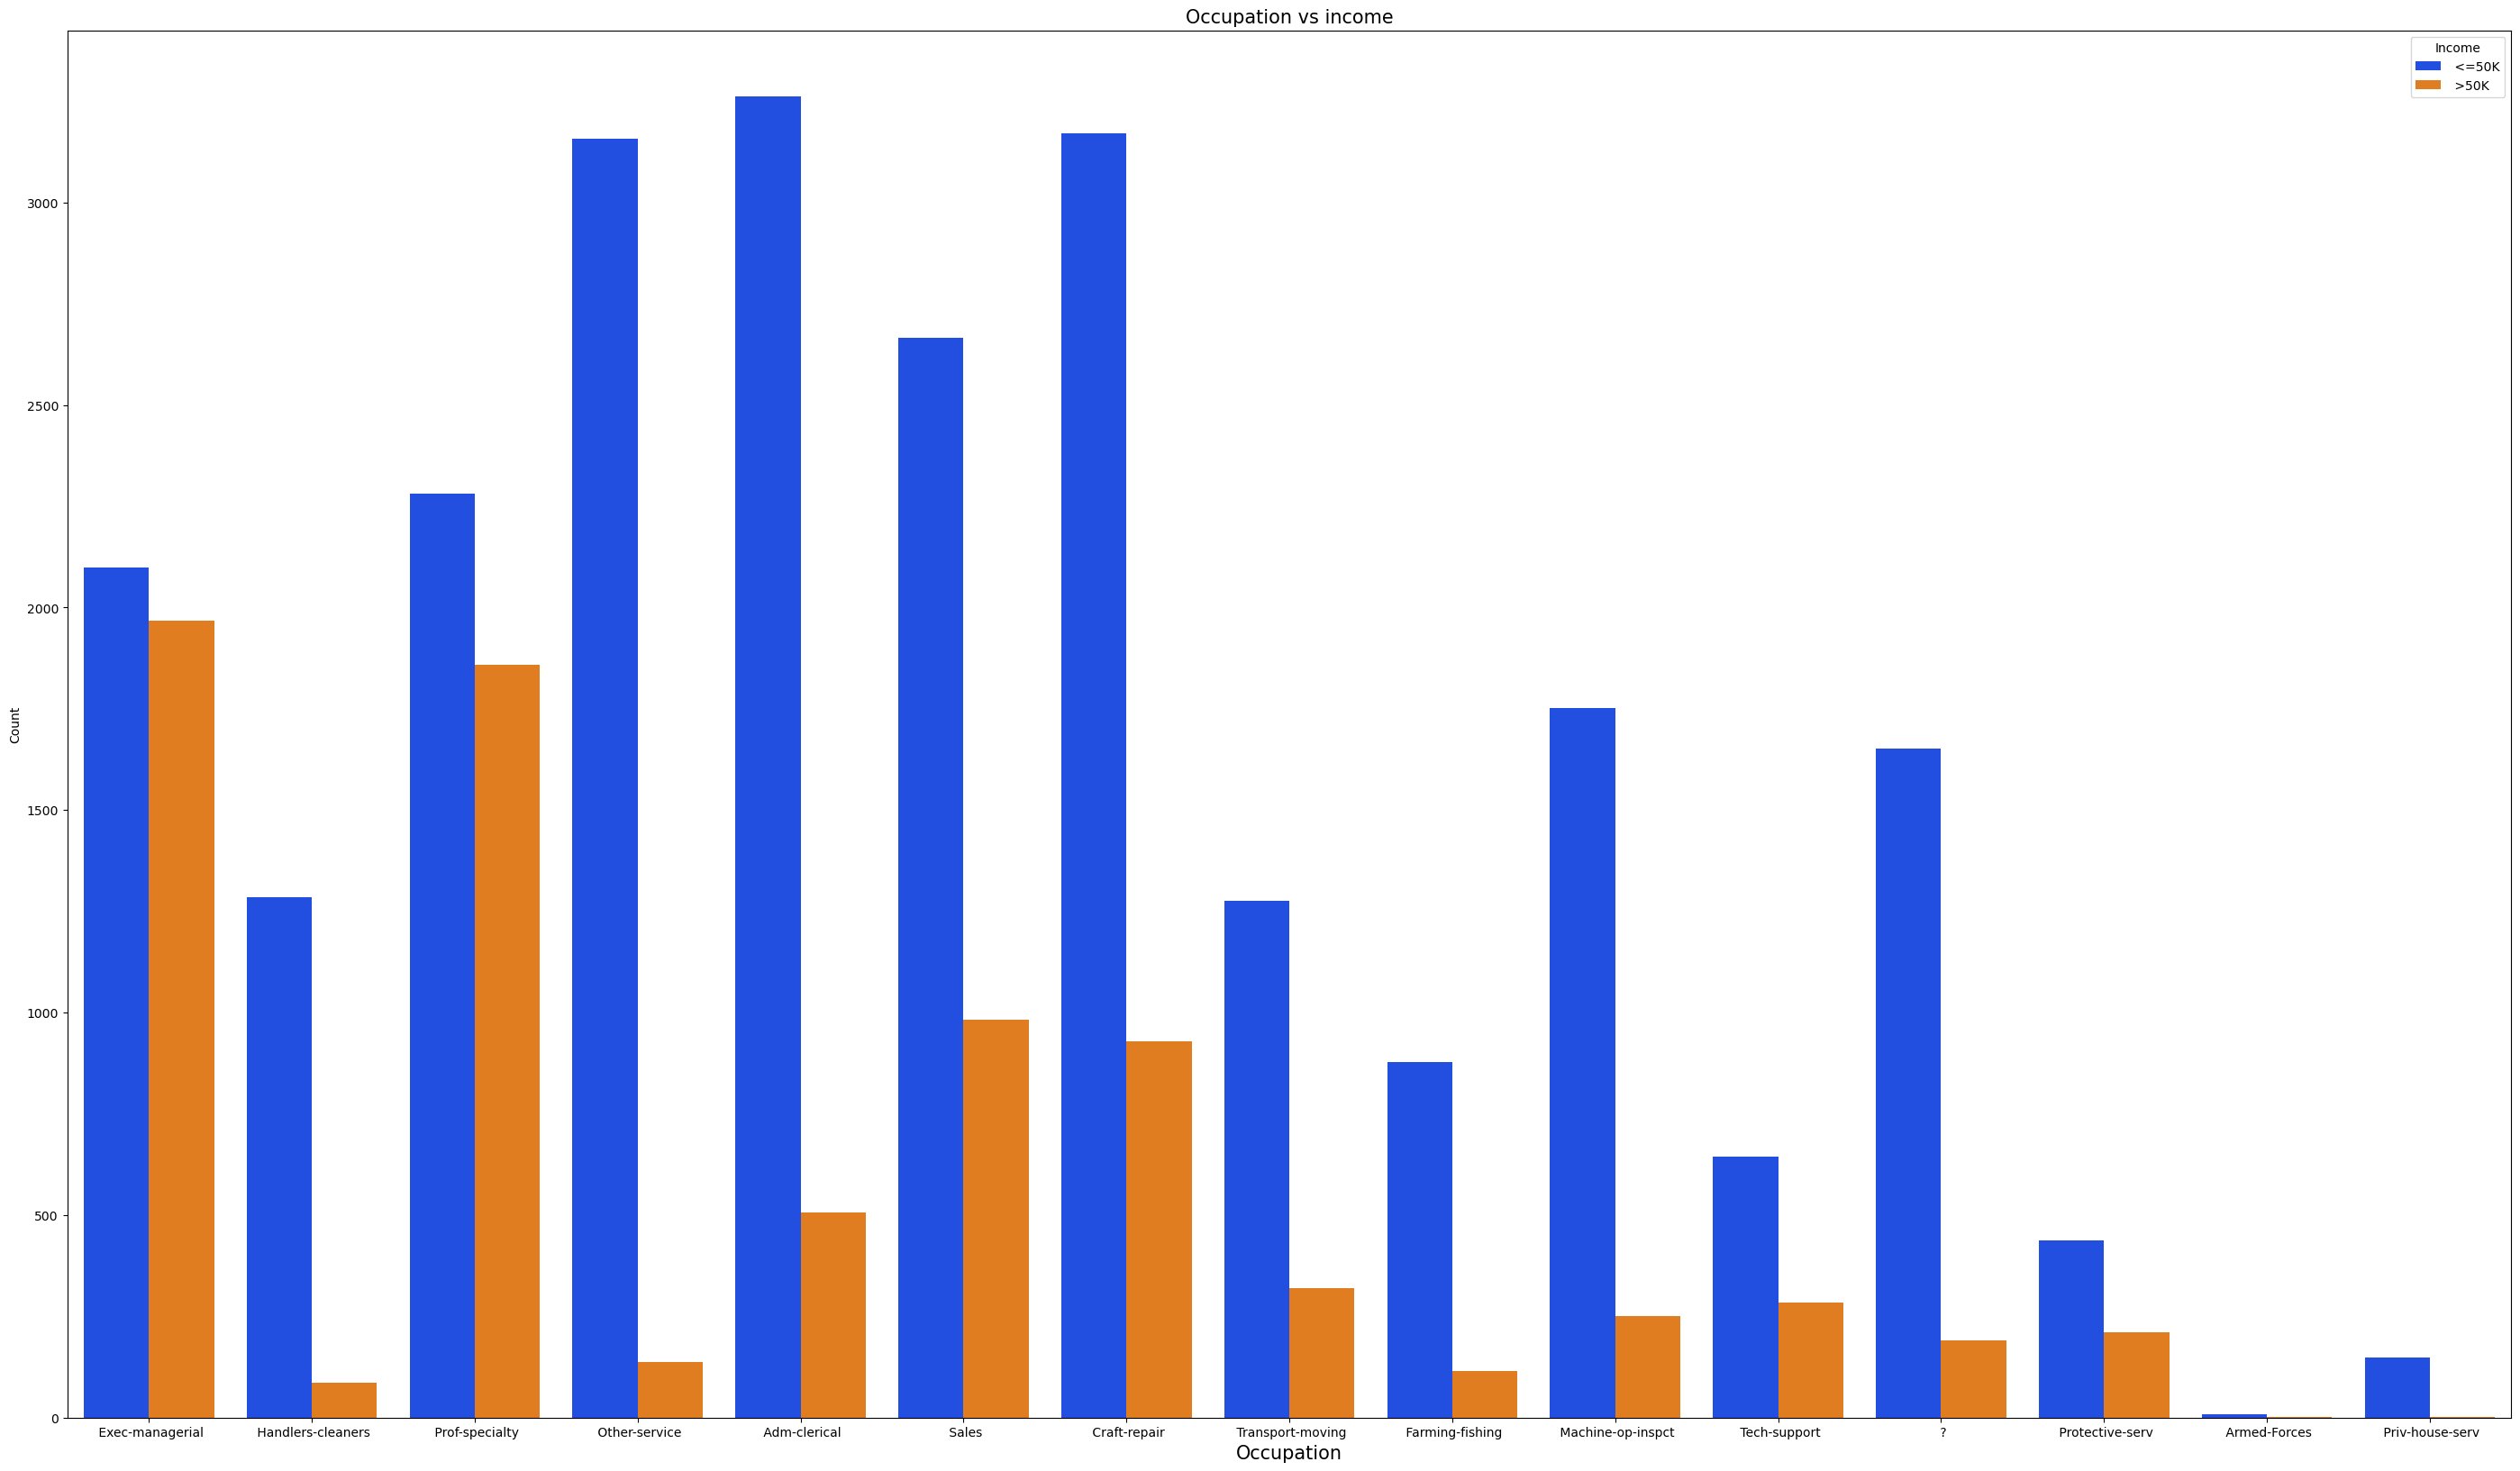

In [111]:
print (df['Occupation'].value_counts())
plt.figure(figsize=(35,20))
sns.countplot(df,x='Occupation',hue='Income',palette='bright')
plt.title('Occupation vs income',fontsize=15)
plt.xlabel ('Occupation',fontsize=15)
plt.ylabel('Count')

#### OBSERVATION:
Individuals employed in the Exec-managerial sector and Prof-specialty  typically earn an annual income exceeding $50,000

In [112]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [113]:
df['Native_country'].mode()

0     United-States
Name: Native_country, dtype: object

#### OBSERVATION:
I will impute the missing values denoted by '?' with the mode value, which in this case is 'United-States

In [114]:
df['Native_country']=df['Native_country'].replace(to_replace=' ?',value='United-States')

In [115]:
df['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', 'United-States',
       ' Mexico', ' South', ' Puerto-Rico', ' Honduras', ' England',
       ' Canada', ' Germany', ' Iran', ' Philippines', ' Italy',
       ' Poland', ' Columbia', ' Cambodia', ' Thailand', ' Ecuador',
       ' Laos', ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [116]:
Contry_val=df['Native_country'].value_counts().values
Contry_Name=df['Native_country'].value_counts().index

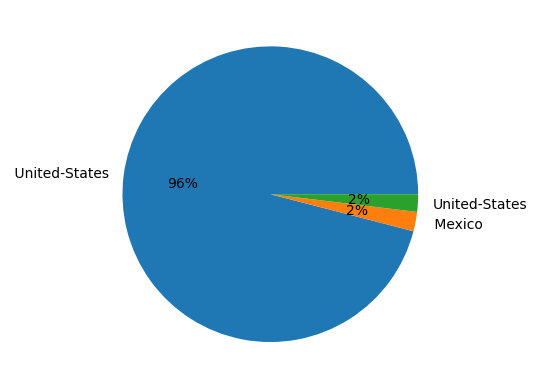

In [117]:
plt.pie(Contry_val[:3],labels=Contry_Name[:3],autopct='%.0f%%')
plt.show()

#### OBSERVATION:
Individuals originating from the United States tend to earn an annual income surpassing $50,000

Text(0, 0.5, 'Count')

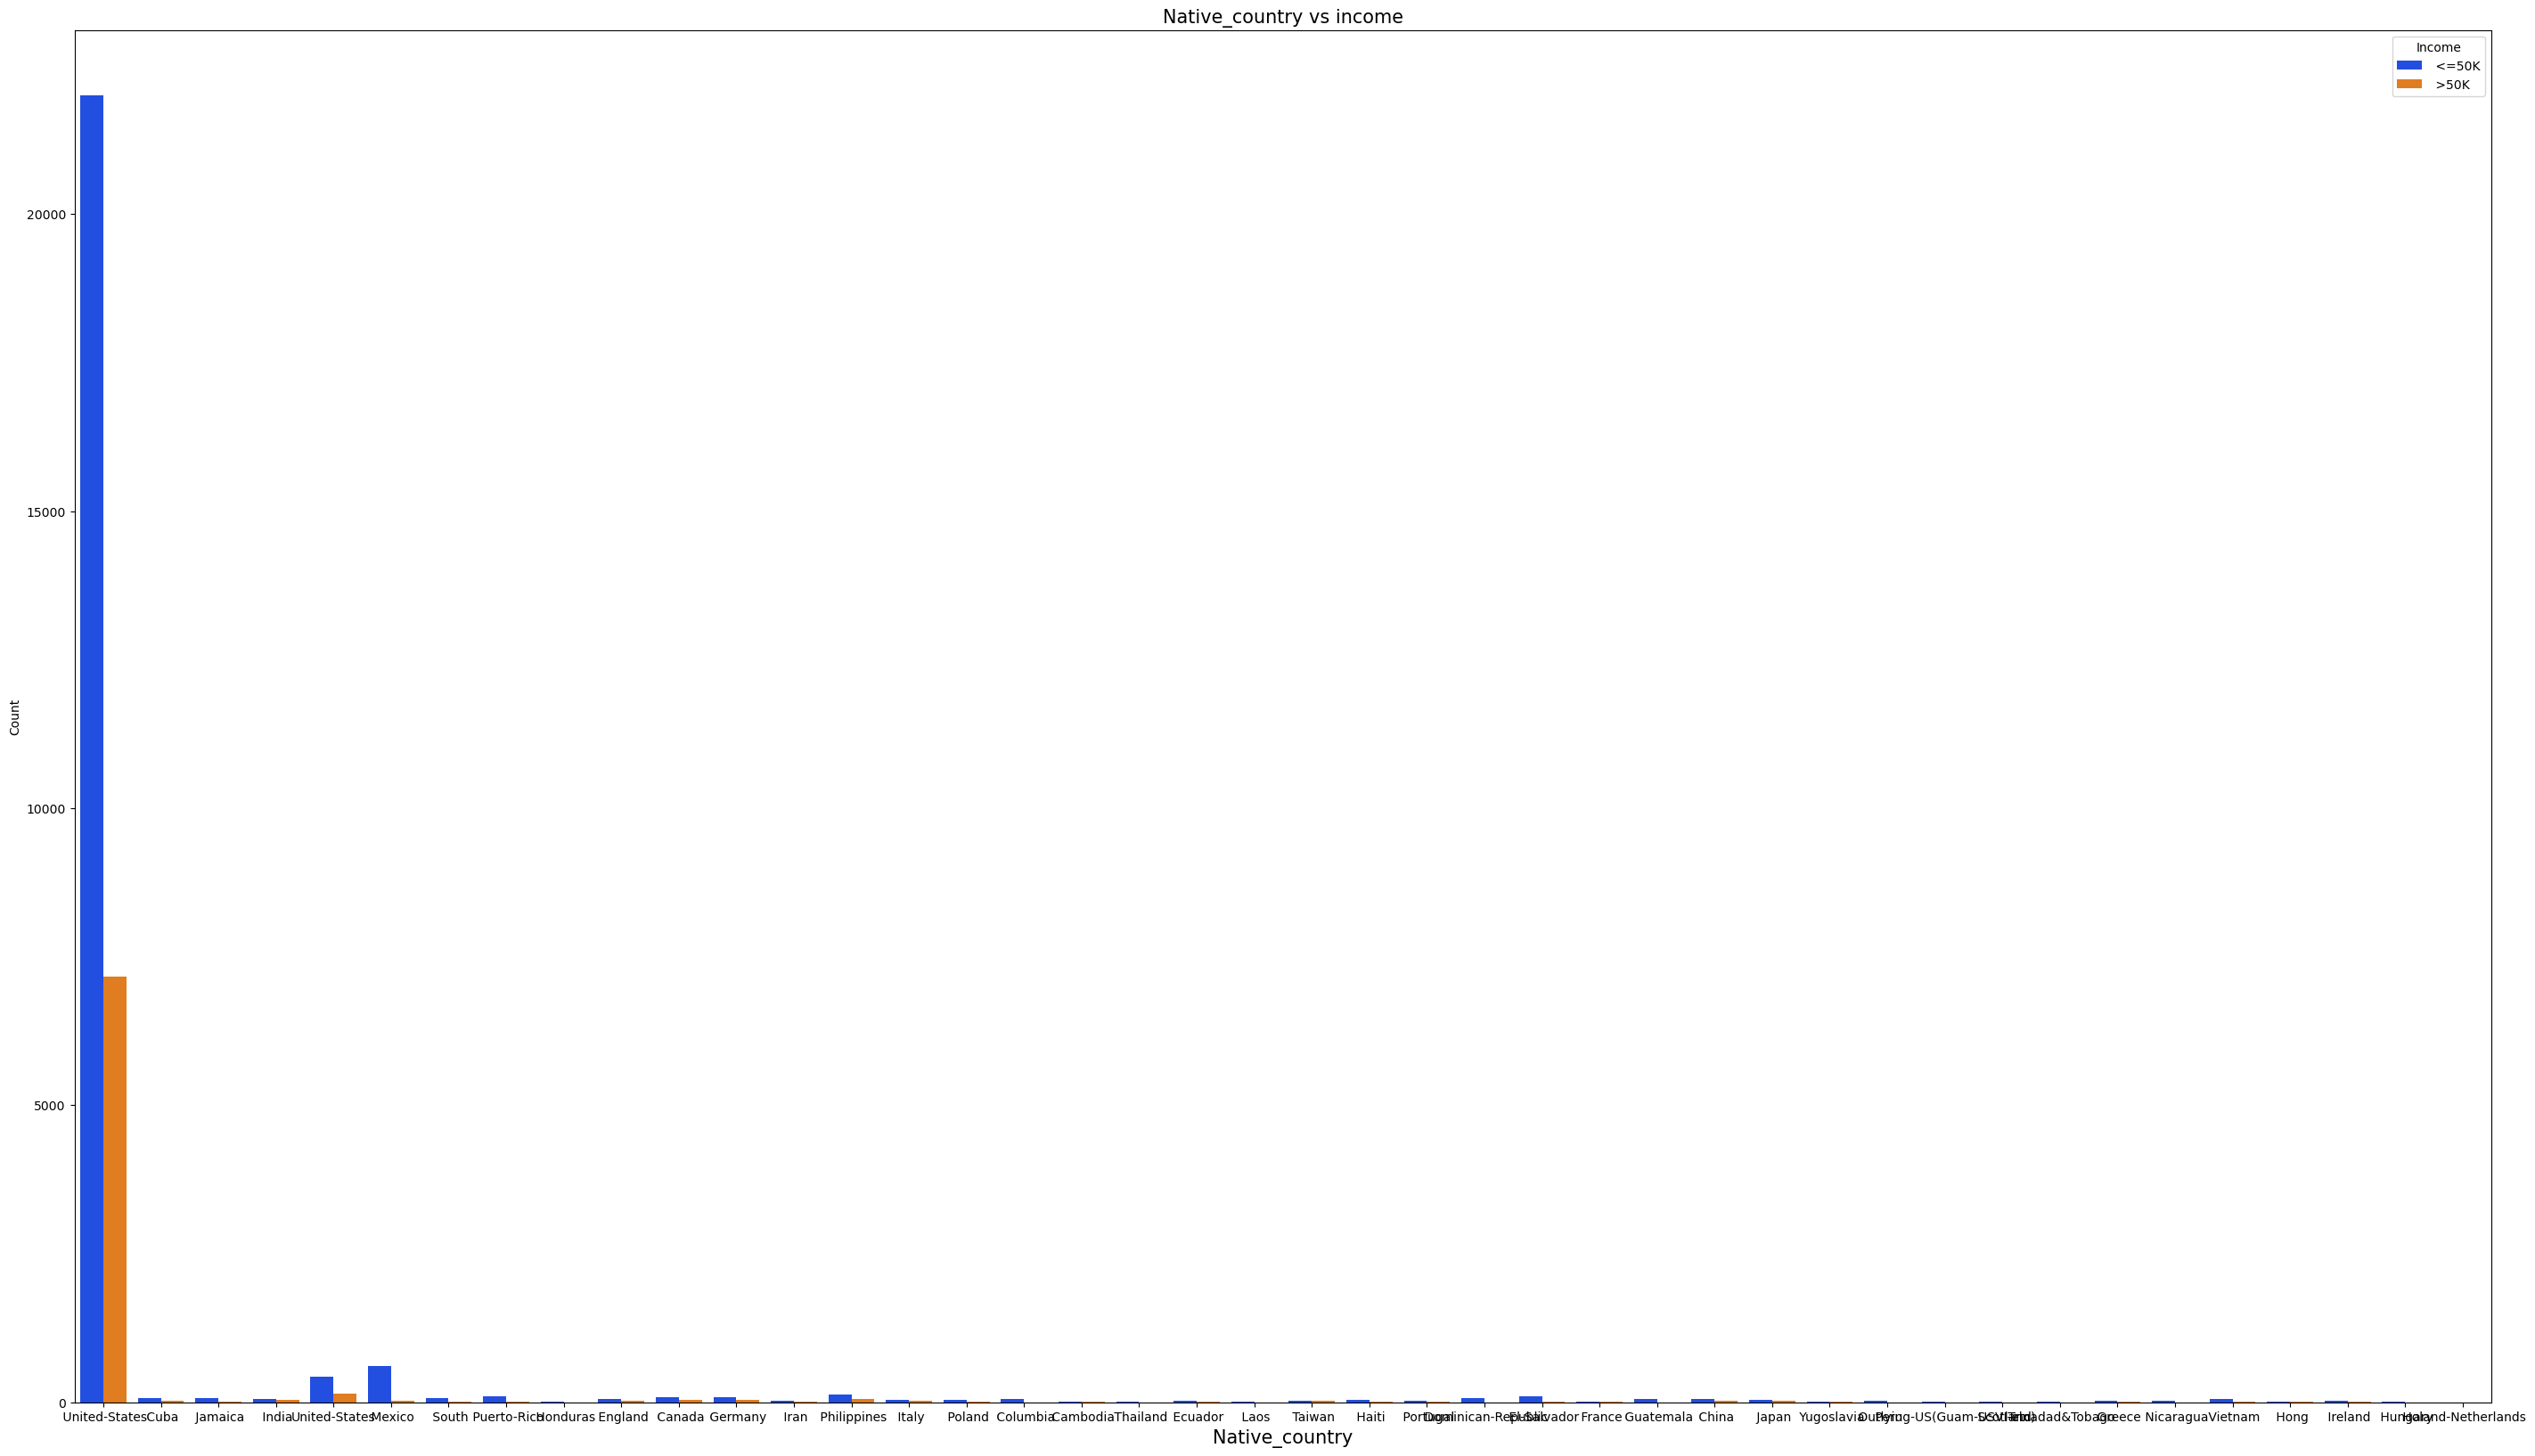

In [118]:

plt.figure(figsize=(35,20))
sns.countplot(df,x='Native_country',hue='Income',palette='bright')
plt.title('Native_country vs income',fontsize=15)
plt.xlabel ('Native_country',fontsize=15)
plt.ylabel('Count')

In [119]:
Catagorical_col=[]
Numarical_col=[]

for i in df.columns:
    if df.dtypes[i]=='object':
        Catagorical_col.append(i)

print ('Catagorical Column names:',Catagorical_col) 

for i in df.columns:
    if df.dtypes[i]!='object':
        Numarical_col.append (i)

print ('Numarical Columns name:',Numarical_col)

Catagorical Column names: ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
Numarical Columns name: ['Age', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


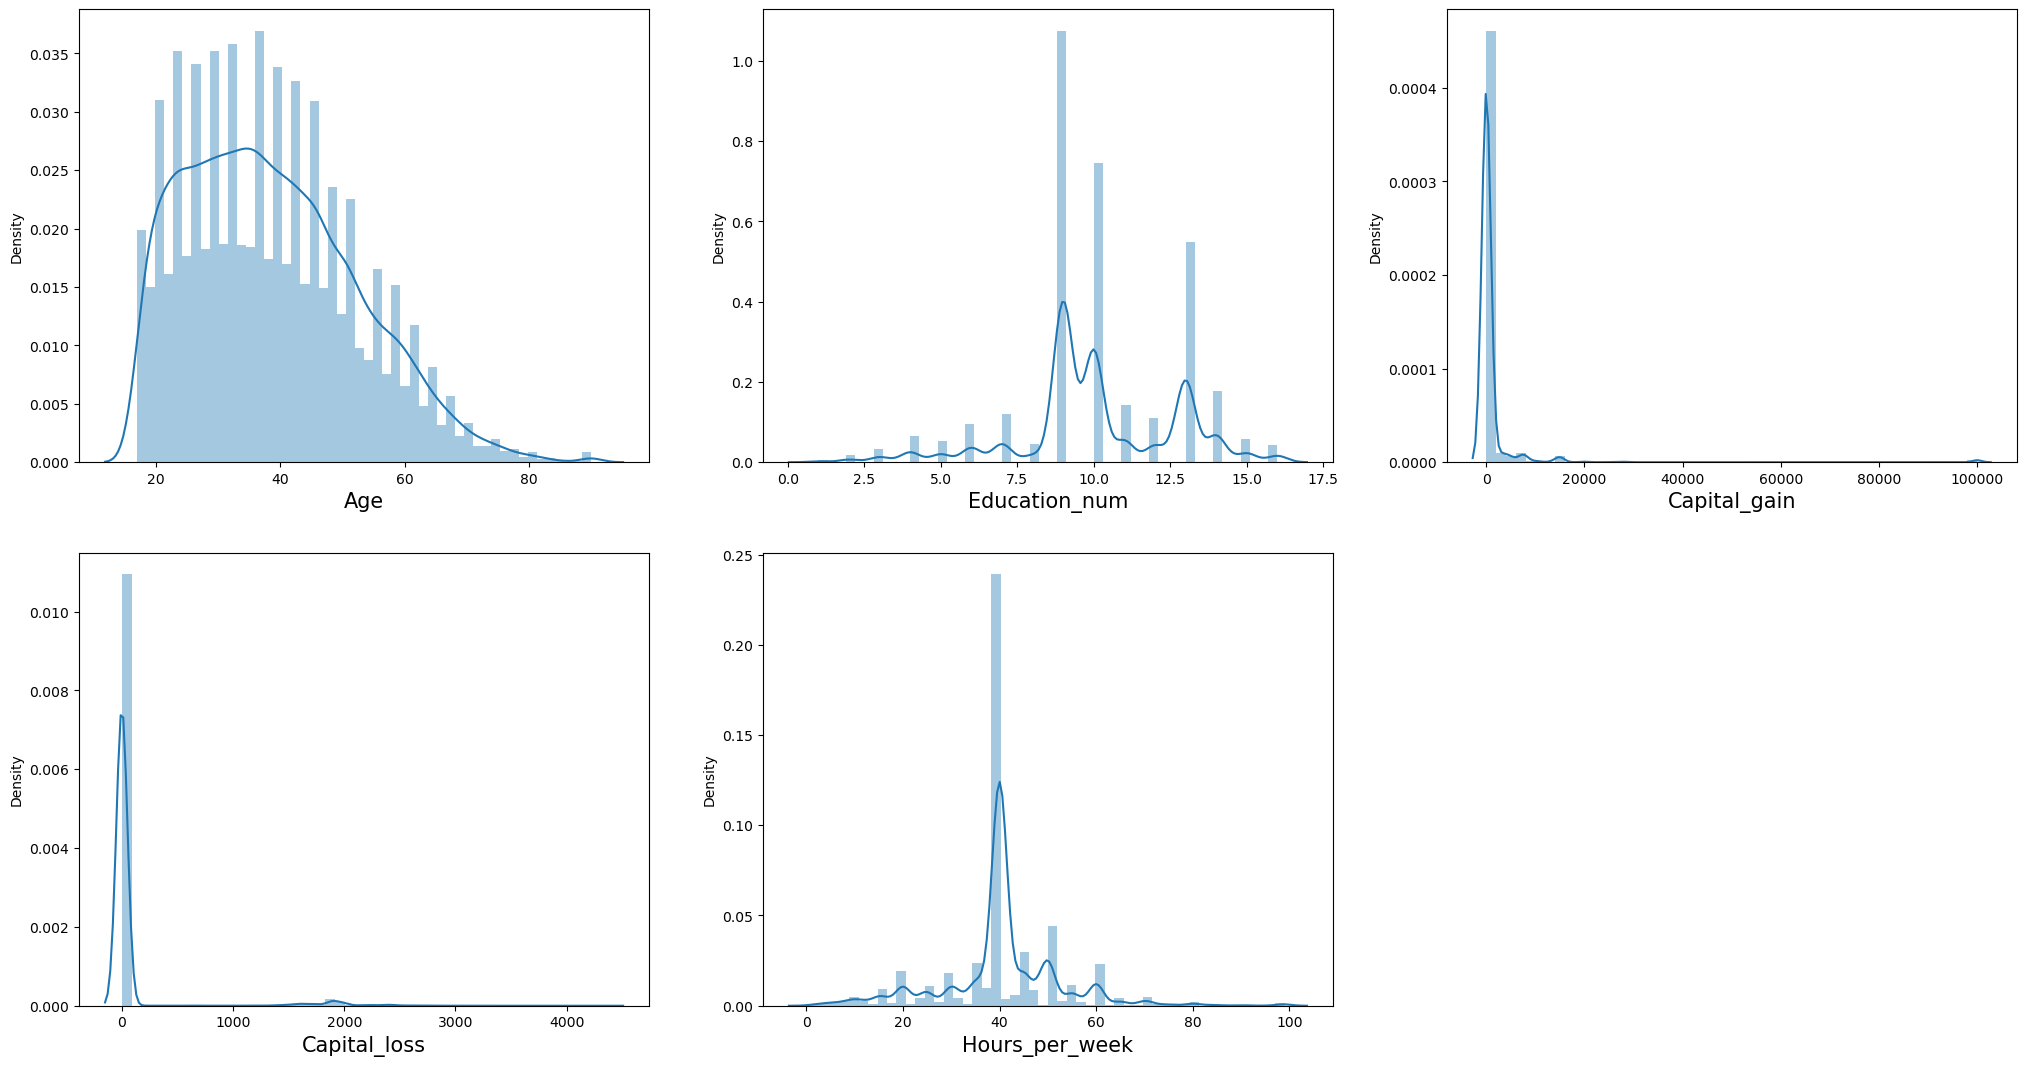

In [120]:
plt.figure(figsize=(25,20))
p=1
for i in Numarical_col:
    if p<=6:
        plt.subplot(3,3,p)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=15)
    p+=1
plt.show()

#### OBSERVATION:
Skewness is evident in this dataset, and addressing it will be a priority in later stages.

Text(0, 0.5, 'Count')

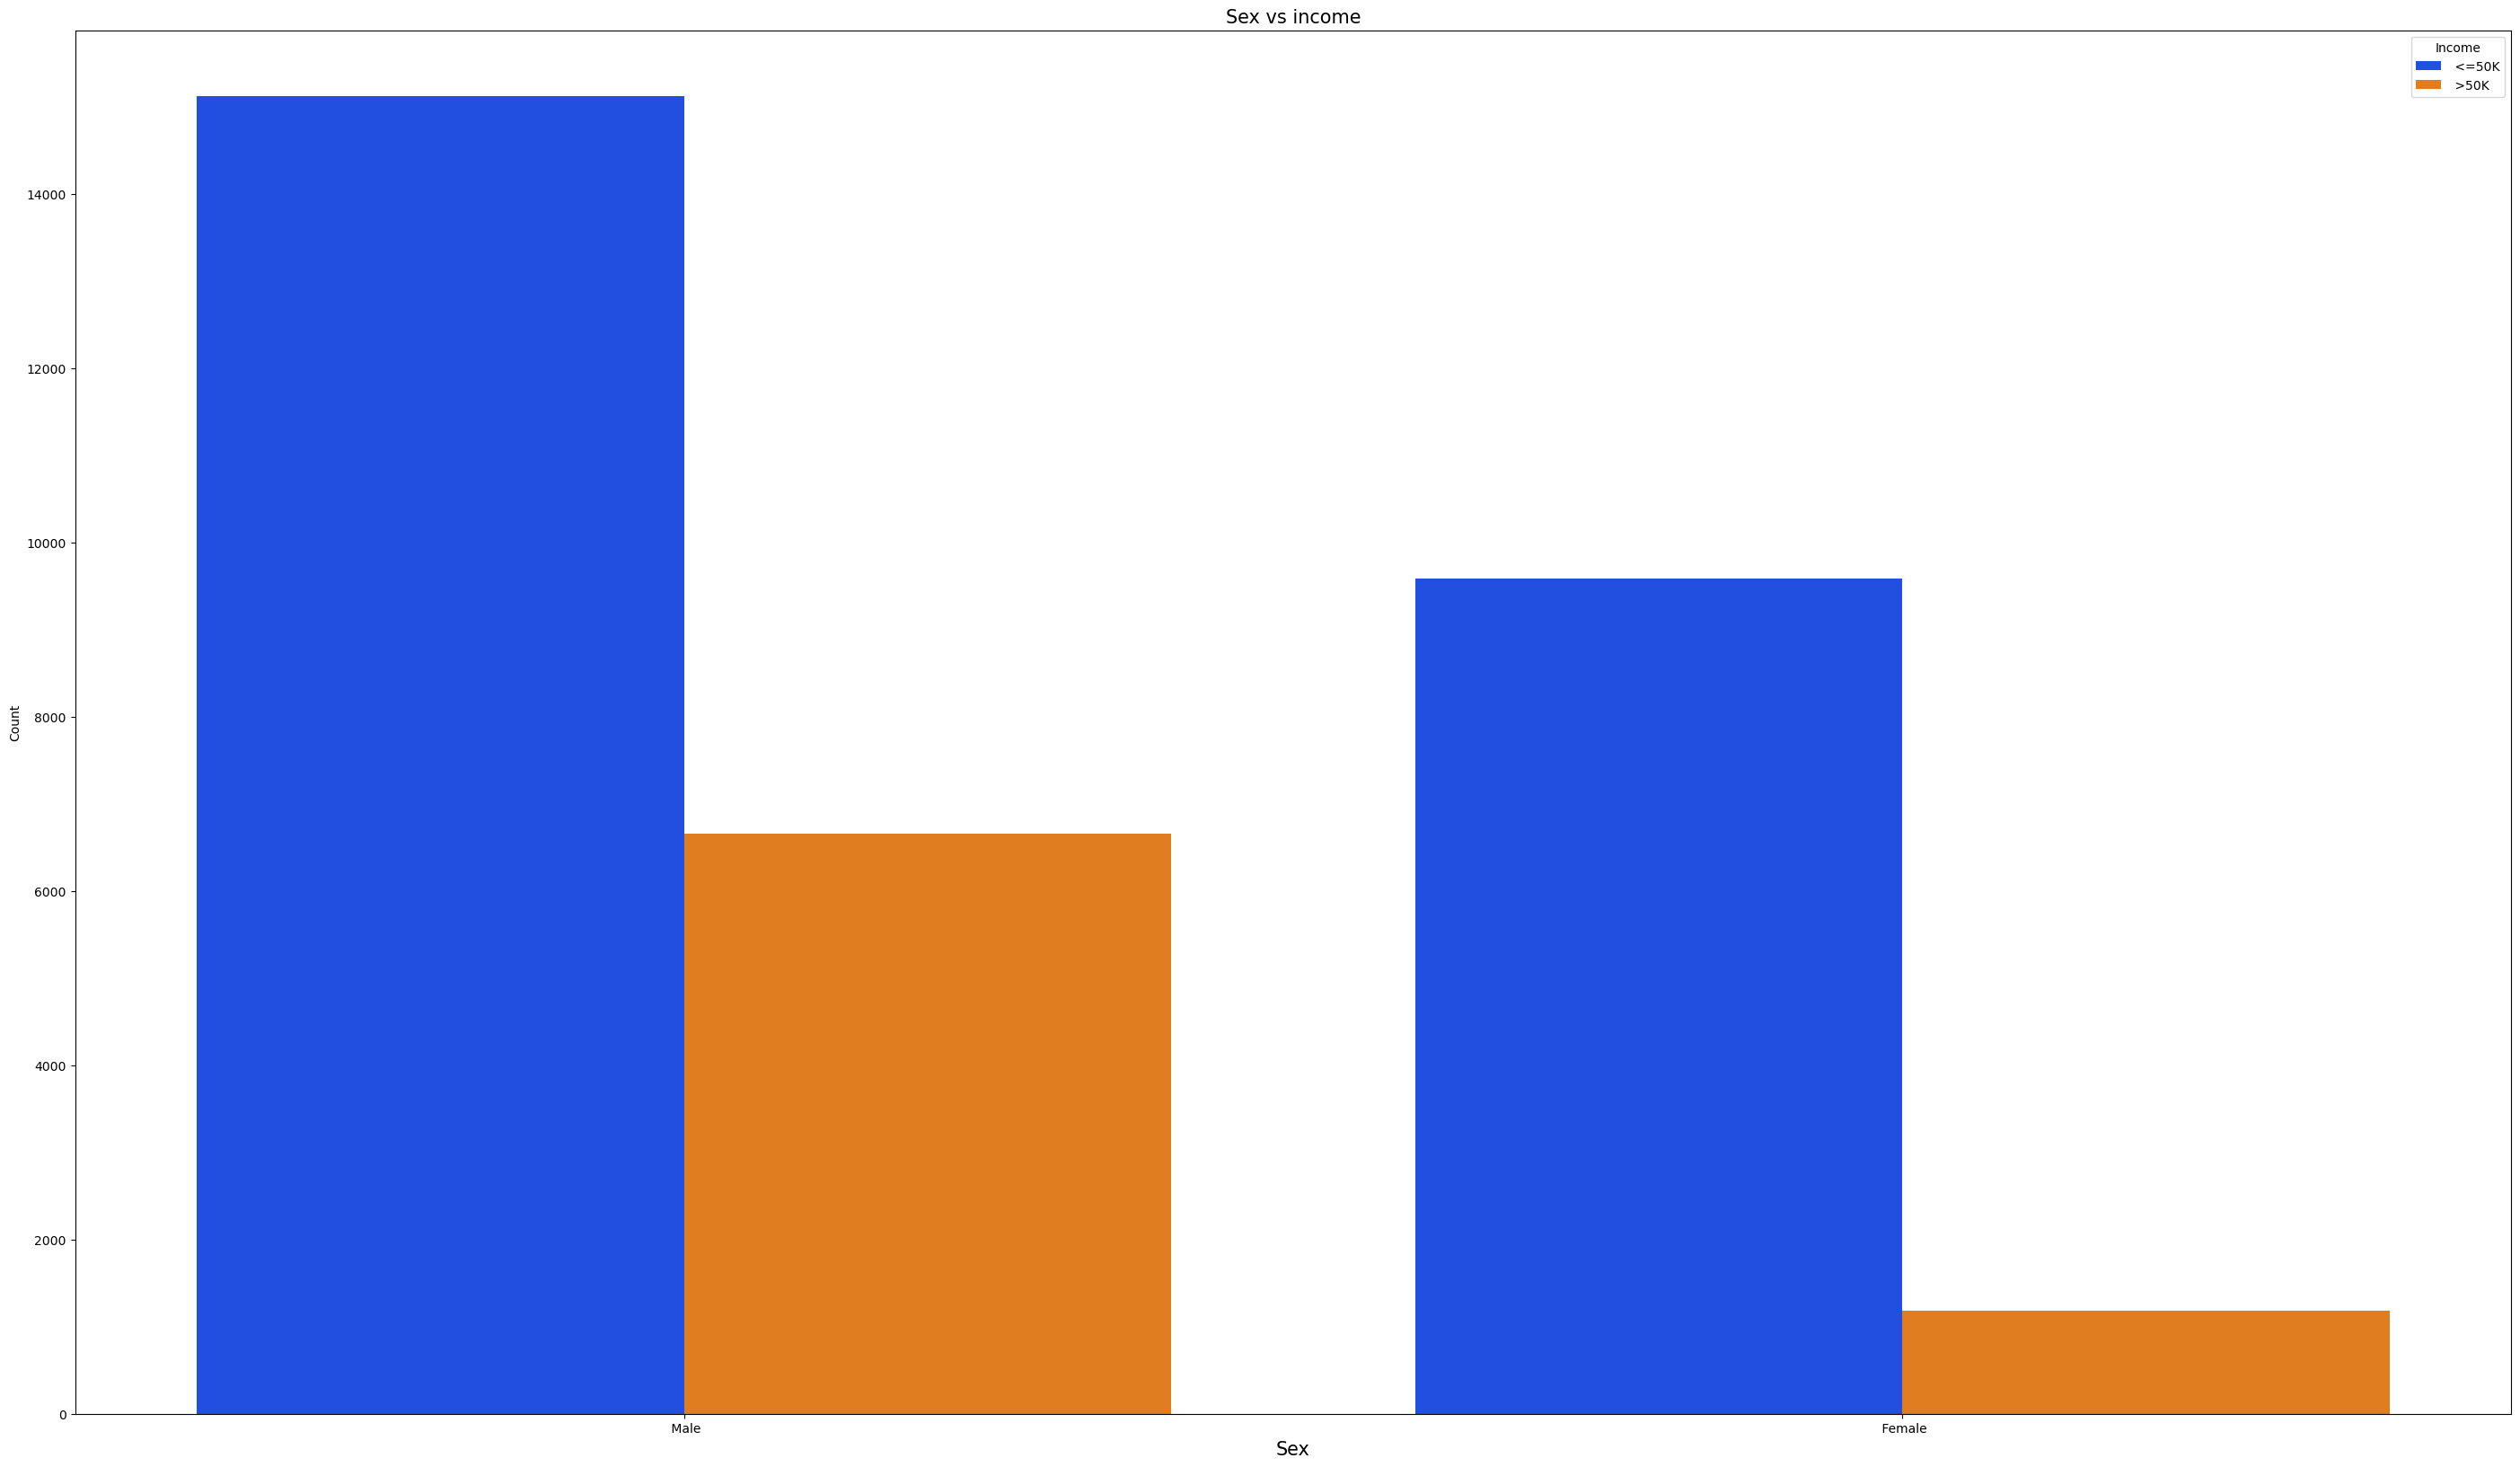

In [121]:
plt.figure(figsize=(35,20))
sns.countplot(df,x='Sex',hue='Income',palette='bright')
plt.title('Sex vs income',fontsize=15)
plt.xlabel ('Sex',fontsize=15)
plt.ylabel('Count')

#### OBSERVATION:
Male employees are more likely to earn over 50k annually compared to their female counterparts.

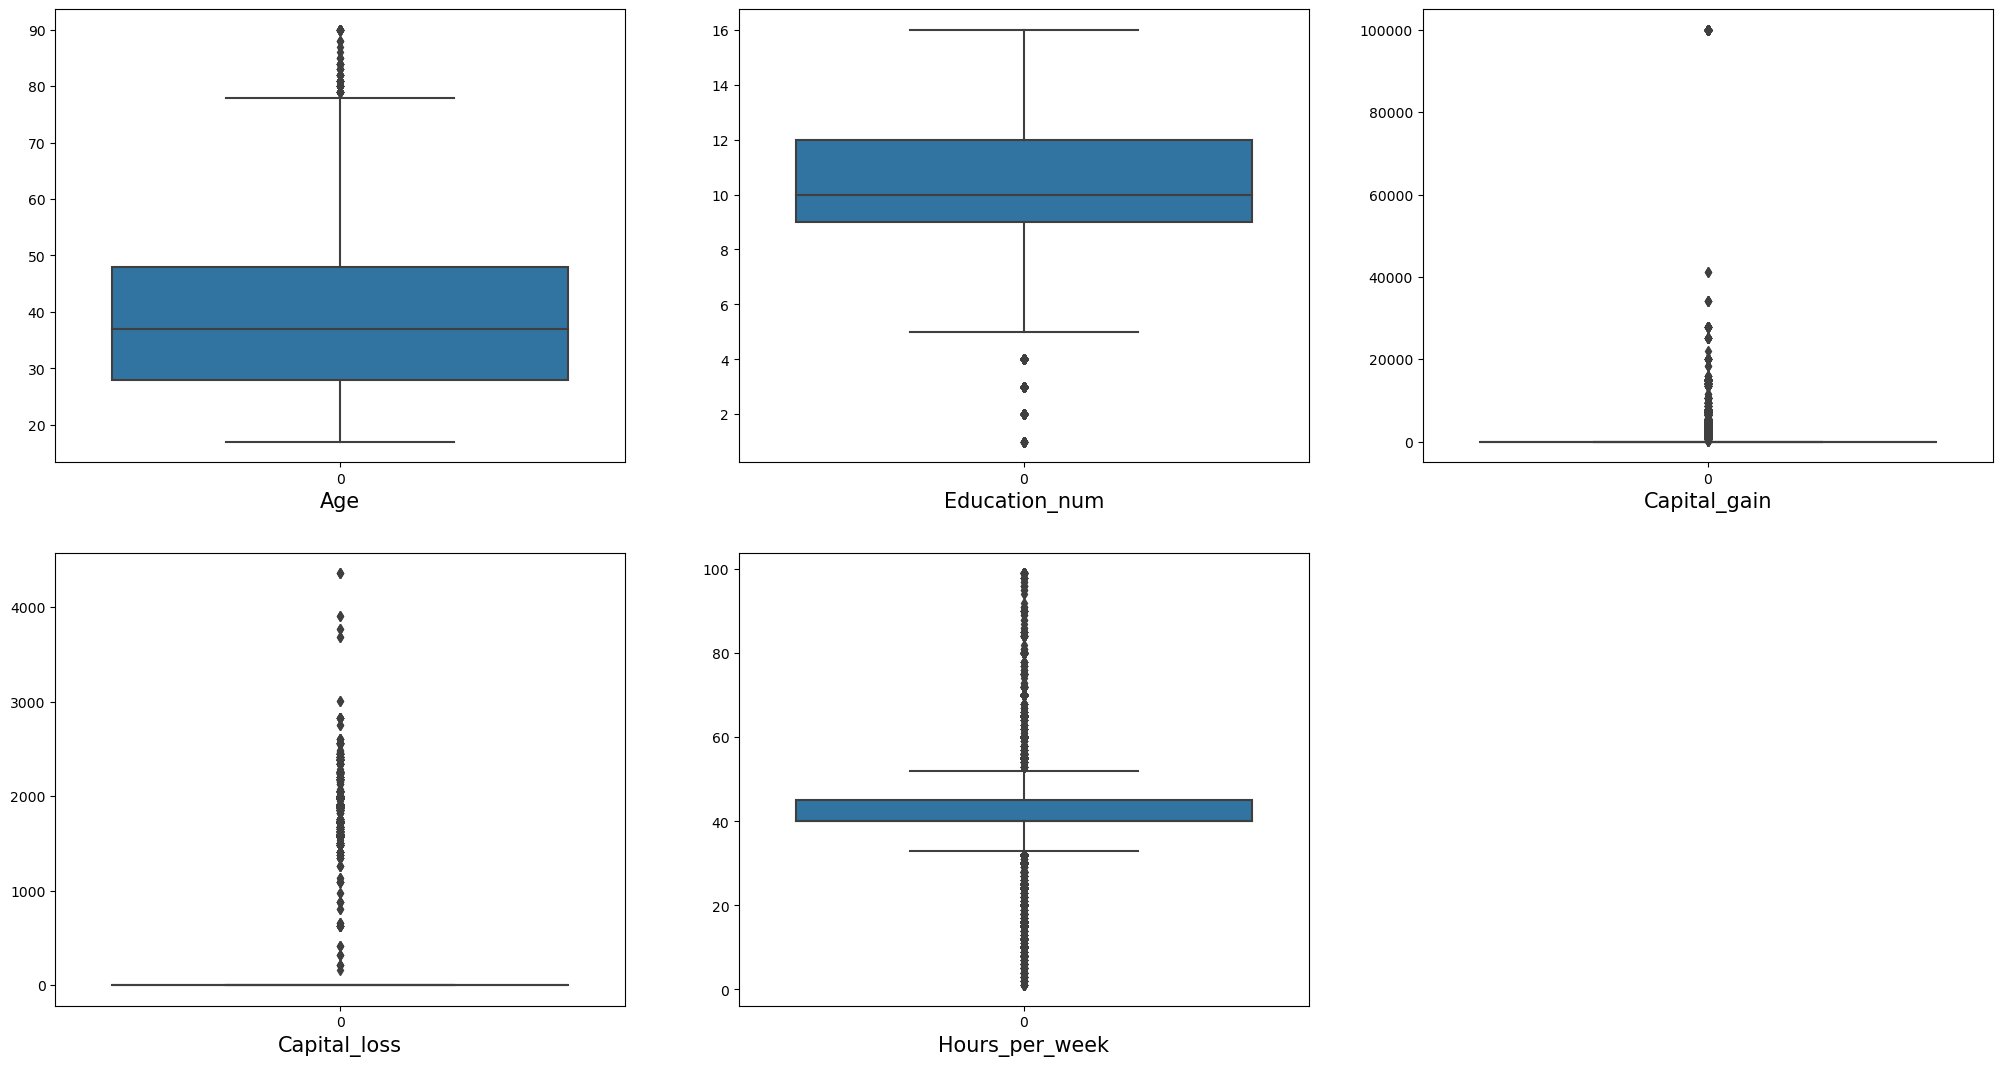

In [122]:
plt.figure(figsize=(25,20))
p=1
for i in Numarical_col:
    if p<=6:
        plt.subplot(3,3,p)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=15)
    p+=1
plt.show()

#### OBSERVATION:
This dataset contains outliers that will need to be addressed.

#### REVIEWING THE DESCRIPTIVE STATISTICS FOR THIS DATASET

In [123]:
df.describe()

,Age,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,10.080590,1077.615172,87.306511,40.437469
std,13.640642,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


#### OBSERVATION:
1. Observing that the mean of the Capital_gain and Capital_loss columns exceeds the median (50th percentile), indicating the presence of right-skewed data points in these columns.
2. And Hours_per_week column shows median is greater then mean that indicates left skewed data point is present
3. Each column exhibits a considerable gap between the third quartile and the maximum data point, suggesting the presence of outliers

In [124]:
df['Workclass'].mode()[0]

' Private'

In [125]:
df['Occupation'].mode()[0]

' Prof-specialty'

In [126]:
df.loc[df['Workclass']== ' ?']

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,United-States,<=50K
68,25,?,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [127]:
df['Workclass']=df['Workclass'].replace(to_replace= ' ?',value='Private')
df['Occupation']=df['Occupation'].replace(to_replace= ' ?',value='Prof-specialty')

In [128]:
for i in df.columns:
    print (df[i].value_counts())
    print ('\n')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
Private               1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       1

####  ENCODING PROCESS

In [129]:
from sklearn.preprocessing import LabelEncoder

In [130]:
Catagorical_col

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [131]:
la=LabelEncoder()
for i in df.columns:
    if df.dtypes[i]=='object':
        df[i]=la.fit_transform(df[i])
df
    

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,11,9,4,0,3,4,1,0,0,20,38,0


#### AGAIN CHECKING DATASET INFO

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Education       32560 non-null  int32
 3   Education_num   32560 non-null  int64
 4   Marital_status  32560 non-null  int32
 5   Occupation      32560 non-null  int32
 6   Relationship    32560 non-null  int32
 7   Race            32560 non-null  int32
 8   Sex             32560 non-null  int32
 9   Capital_gain    32560 non-null  int64
 10  Capital_loss    32560 non-null  int64
 11  Hours_per_week  32560 non-null  int64
 12  Native_country  32560 non-null  int32
 13  Income          32560 non-null  int32
dtypes: int32(9), int64(5)
memory usage: 2.4 MB


#### OBSERVATION:
I have successfully converted all categorical columns into numerical columns.

#### CORRELATION CHECK

<Axes: >

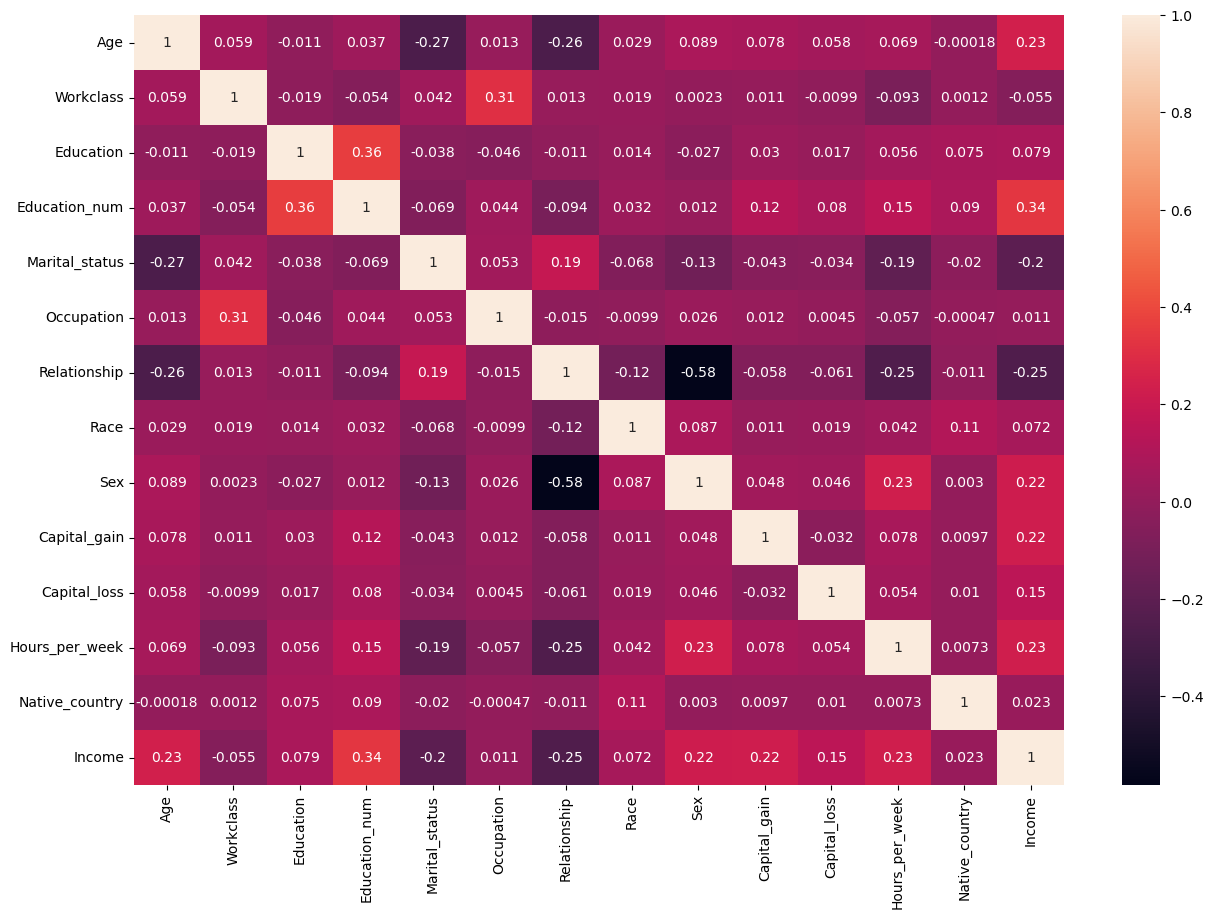

In [133]:
df_cor=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df_cor,annot=True)

#### CHECKING OUTLIERS

In [134]:
import scipy
from scipy.stats import zscore

In [135]:
z=np.abs (zscore(df))
thresold=3
print (np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([12, 11,  7, ...,  7,  7,  7], dtype=int64))


In [136]:
z.iloc[3,12]

5.337886244992503

In [137]:
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,1,7,2,5,0,2,1,0,0,40,38,0
4,37,3,12,14,2,3,5,4,0,0,0,40,38,0
5,49,3,6,5,3,7,1,2,0,0,0,16,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,11,9,4,0,3,4,1,0,0,20,38,0


In [138]:
df

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,11,9,4,0,3,4,1,0,0,20,38,0


#### OBSERVATION:
I will losing nearly 13% of the data upon the removal of outliers

In [139]:
df= df_new

In [140]:
df.skew()

Age                0.487970
Workclass          1.184891
Education         -0.955307
Education_num     -0.148137
Marital_status    -0.047045
Occupation         0.136941
Relationship       0.751844
Race              -2.549513
Sex               -0.689828
Capital_gain       4.926969
Capital_loss      29.686789
Hours_per_week    -0.360363
Native_country    -5.119005
Income             1.323336
dtype: float64

In [141]:
df['Workclass']=np.sqrt(df['Workclass'])
print (df['Workclass'].skew())

-0.9558163865580181


In [142]:
df['Race']=np.cbrt(df['Race'])
print(df['Race'].skew())

-2.5601835251157614


In [143]:
df['Capital_gain']=np.sqrt(df['Capital_gain'])
print (df['Capital_gain'].skew())

3.6816559779372535


In [144]:
df['Capital_gain']=np.sqrt(df['Capital_gain'])
print (df['Capital_gain'].skew())

3.244231130673805


#### SPLIT THE DATA

In [145]:
x=df.drop('Income',axis=1)
y=df['Income']
print (x.shape)
print(y.shape)

(28094, 13)
(28094,)


#### SCALE THE DATASET

In [146]:
from sklearn.preprocessing import StandardScaler

In [147]:
scale=StandardScaler()
x=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.887322,0.972738,-0.343612,1.213558,-0.405329,-0.777146,-0.914774,0.347971,0.712910,-0.292188,-0.036998,-2.416777,0.168252
1,-0.009121,-0.078164,0.172104,-0.438909,-1.722316,-0.317060,-0.292099,0.347971,0.712910,-0.292188,-0.036998,0.007142,0.168252
2,1.111432,-0.078164,-2.406479,-1.265142,-0.405329,-0.317060,-0.914774,-2.929384,0.712910,-0.292188,-0.036998,0.007142,0.168252
3,-0.083824,-0.078164,0.429963,1.626675,-0.405329,-0.777146,2.198602,0.347971,-1.402702,-0.292188,-0.036998,0.007142,0.168252
4,0.812618,-0.078164,-1.117187,-2.091376,0.253164,0.143026,-0.292099,-2.929384,-1.402702,-0.292188,-0.036998,-2.147453,-6.239439
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28089,-0.830859,-0.078164,-0.859329,0.800441,-0.405329,1.293240,2.198602,0.347971,-1.402702,-0.292188,-0.036998,-0.172408,0.168252
28090,0.140286,-0.078164,0.172104,-0.438909,-0.405329,-0.087017,-0.914774,0.347971,0.712910,-0.292188,-0.036998,0.007142,0.168252
28091,1.484950,-0.078164,0.172104,-0.438909,2.228643,-1.467275,1.575926,0.347971,-1.402702,-0.292188,-0.036998,0.007142,0.168252
28092,-1.204377,-0.078164,0.172104,-0.438909,0.911657,-1.467275,0.953251,0.347971,0.712910,-0.292188,-0.036998,-1.788354,0.168252


#### VIF CHECKING

In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [149]:
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor (x.values,i) for i in range (len (x.columns))]
vif['Features']=x.columns
vif

,VIF Factor,Features
0,1.178232,Age
1,1.083807,Workclass
2,1.148349,Education
3,1.226934,Education_num
4,1.142594,Marital_status
5,1.084186,Occupation
6,1.678387,Relationship
7,1.038279,Race
8,1.548606,Sex
9,1.039610,Capital_gain


#### OBSERVATION:
No VIF present in this dataset

#### OVERSAMPLING 

In [150]:
import imblearn
from imblearn.over_sampling import SMOTE

In [151]:
sm=SMOTE()
x_new,y_new=sm.fit_resample(x,y)
print (y.value_counts())
print (y_new.value_counts())

0    21798
1     6296
Name: Income, dtype: int64
0    21798
1    21798
Name: Income, dtype: int64


In [152]:
x,y=x_new,y_new
print(y.value_counts())

0    21798
1    21798
Name: Income, dtype: int64


#### MODEL BUILDUP

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [154]:
maxACC=0
maxRE=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    lg_pred=lg.predict (x_test)
    acc=accuracy_score(lg_pred,y_test)
    if acc>maxACC:
        maxACC=acc
        maxRE=i
        
print ('Best Accuracy Score:', maxACC, 'Best Random Estate:',maxRE)

Best Accuracy Score: 0.773394495412844 Best Random Estate: 160


In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

In [156]:
model_def={}
def classificationModel(model):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=14)
    model.fit (x_train,y_train)
    model_pred=model.predict (x_test)
    print ('Best Model traning Score:',model.score (x_train,y_train))
    print ('Best Accuracy Score:',accuracy_score(model_pred,y_test))
    print ('\n')
    
    score=cross_val_score(model,x,y,cv=7)
    print ('Best CV Score:',np.mean (score))
    model_def[model]=round(np.mean(score)*100,2)
    

    

In [170]:
model_def

{LogisticRegression(): 76.36,
 RandomForestClassifier(): 89.11,
 ExtraTreesClassifier(): 89.69,
 GradientBoostingClassifier(): 85.76,
 AdaBoostClassifier(): 84.54,
 BaggingClassifier(): 87.95,
 DecisionTreeClassifier(): 85.75}

In [158]:
model=LogisticRegression()
classificationModel(model)

Best Model traning Score: 0.761211148067439
Best Accuracy Score: 0.7731651376146789


Best CV Score: 0.7636251032204789


In [159]:
model=RandomForestClassifier()
classificationModel(model)

Best Model traning Score: 0.982394770042436
Best Accuracy Score: 0.8930045871559633


Best CV Score: 0.8911138636572161


In [160]:
model=ExtraTreesClassifier()
classificationModel(model)

Best Model traning Score: 0.9824234430553963
Best Accuracy Score: 0.8951834862385321


Best CV Score: 0.8968712725938159


In [163]:
model=GradientBoostingClassifier()
classificationModel(model)

Best Model traning Score: 0.8603337538708568
Best Accuracy Score: 0.8673165137614679


Best CV Score: 0.8575786769428388


In [165]:
model=AdaBoostClassifier()
classificationModel(model)

Best Model traning Score: 0.8454811331574722
Best Accuracy Score: 0.8520642201834863


Best CV Score: 0.8453986604275621


In [167]:
model=BaggingClassifier()
classificationModel(model)

Best Model traning Score: 0.9763447643078335
Best Accuracy Score: 0.8860091743119266


Best CV Score: 0.879530232131388


In [169]:
model=DecisionTreeClassifier()
classificationModel(model)

Best Model traning Score: 0.9824234430553963
Best Accuracy Score: 0.8622706422018349


Best CV Score: 0.8574869254060006


#### OBSERVATION
After evaluating various regression models based on Accuracy score and cross-validation scores, ExtraTreesClassifier is identified as the most suitable model for the given dataset.

#### HYPERPARAMETER TUNING

In [175]:
prama={'n_estimators':[10,20,40,100],
      'criterion':['gini','entropy'],
      'max_features':['sqrt','log2']}

In [176]:
from sklearn.model_selection import GridSearchCV

In [177]:
gscv=GridSearchCV(ExtraTreesClassifier(),prama,cv=9)
gscv.fit (x_train,y_train)

GridSearchCV(cv=9, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 20, 40, 100]})

In [178]:
gscv.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100}

In [180]:
final_Model=ExtraTreesClassifier(criterion='entropy',max_features='sqrt',n_estimators=100)
final_Model.fit(x_train,y_train)
final_Model_pred=final_Model.predict(x_test)
print ('Best Model Score:' , final_Model.score(x_train,y_train))
print ('Best Accuracy Score:',accuracy_score(final_Model_pred,y_test))



score=cross_val_score(final_Model,x,y,cv=7)
print('Best CV Score:', np.mean(score))

Best Model Score: 0.9820506938869137
Best Accuracy Score: 0.8911697247706422
Best CV Score: 0.8964583906780439


# SAVE THE MODEL

In [182]:
import joblib
joblib.dump(final_Model,'final_Model_Census_predction.obj')

['final_Model_Census_predction.obj']

In [183]:
Census_prediction_Model=joblib.load('final_Model_Census_predction.obj')
Census_prediction_Model.predict (x_test)

array([0, 1, 1, ..., 1, 1, 0])

#### TEST THE MODEL

In [184]:
def Modeltest(p):
    p=p.reshape (1,-1)
    pred=Census_prediction_Model.predict(p)
    
    if pred==0:
        print ("The annual income will be <50k")
    else:
        print ("The annual income will be >50k")

In [185]:
p=np.array([0.885462,0.472738,-0.223612,1.285648,-0.505329,-0.757146,-0.745774,0.348961,0.754910,-0.392188,-0.126998,-2.516777,0.268252])

In [186]:
Modeltest(p)

The annual income will be >50k
